# Mushroom Classification

## Introduction

### Context
Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

### Content
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

Time period: Donated to UCI ML 27 April 1987

### Acknowledgements
This dataset was originally donated to the UCI Machine Learning repository. You can learn more about past research using the data [here] (https://www.kaggle.com/uciml/mushroom-classification).

### About the project
Select a dataset of your choice and create a supervised machine learning algorithm to provide further insight into the data.
Which features are most indicative of a poisonous mushroom?

For this project, we:
1. __Explore the data__ - what are the fields, how are they distributed, will they require any transformation? 
2. __Prepare the dataset__ for machine learning
3. __Create a supervised machine learning model__
4. __Measure the accuracy__ of the model

## Attribute Information

| Attribute | Description | Key |
|-----------|-------------|-----|
| class     | is it edible or poinosous? | edible=e, poisonous=p |
| cap-shape | cap shape   | bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s |
| cap-surface | texture of cap surface | fibrous=f, grooves=g, scaly=y, smooth=s |
| cap-color | colour of the cap | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y |
| bruises   | does it have bruises? | bruises=t, no=f |
| odor      | what odor | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s |
| gill-attachment | type of attachment | attached=a, descending=d, free=f, notched=n |
| gill-spacing  | spaces between gills | close=c, crowded=w, distant=d |
| gill-size     | size of gills | broad=b, narrow=n |
| gill-color    | colour of gills | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y |
| stall-shape   | shape of the stalk    |  enlarging=e, tapering=t |
| stalk-root    | shape of the root stalk | bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? |
| stalk-surface-above-ring | texture of the stalk above the ring | fibrous=f, scaly=y, silky=k, smooth=s |
| stalk-surface-below-ring | texture of the stalk below the ring | fibrous=f, scaly=y, silky=k, smooth=s |
| stalk-color-above-ring | color of the stalk above the ring | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| stalk-color-below-ring | color of the stalk below the ring | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y |
| veil-type | type of veil | partial=p, universal=u |
| veil-color | colour of veil | brown=n, orange=o, white=w, yellow=y |
| ring-number | no. of rings | none=n, one=o, two=t |
| ring-type | type of ring  | cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z |
| spore-print-color | spore print color | cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z |
| population | population | abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y |
| habitat | where does it grow | grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d |





## 1. Import Modules & Load Dataset

In [409]:
# import modules and fuctions to be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

In [410]:
# Read the file
mushrooms = pd.read_csv('mushrooms.csv')
#display the first 5 lines of the dataset
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [411]:
# check for any missing values
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in the dataset.

In [412]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

From the above output, we can see that: 
* the values are stored as object data-types 
* the dataframe contains all __categorical features__ which we will need to __convert to numerical values__ later on
* I will also rename the column names to follow the normal Snake case for Python and rename the target variable (what we are trying to predict), `class` to `class_ep` as 'class' is also a Python keyword

## 2. Preparing the dataset

### 2.1 Rename the columns
Below, we rename the columns in Snake Case style and rename the target variable, `class` to `class_ep`.

In [413]:
# replace 
for col in mushrooms.columns:
    if '-' in col:
        mushrooms = mushrooms.rename(columns={col:col.replace('-','_')})
        
mushrooms.rename(columns = {'class':'class_ep'}, inplace = True)

In [414]:
mushrooms.head()

,class_ep,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [415]:
mushrooms.describe()

,class_ep,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## 3. Exploratory Analysis

I started by plotting the different features against the target variable i.e. whether the mushrooms is poisonous or not to see if we can spot any trends or any potential important predictors.

### 3.1 Exploring Gill Size

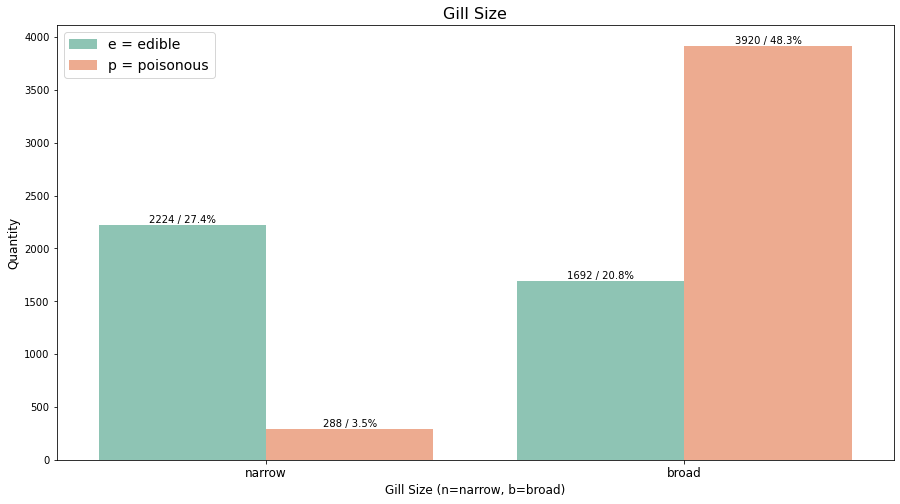

In [416]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=mushrooms, x='gill_size', hue='class_ep', palette='Set2', alpha=0.8)
ax.legend(['e = edible', 'p = poisonous'], fontsize=14)
ax.set_xlabel('Gill Size (n=narrow, b=broad)', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
ax.set_xticklabels(('narrow','broad'), fontsize=12)
ax.set_title('Gill Size', fontsize=16)


total_cnt = mushrooms['class_ep'].count()

for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width/ 2, height + 50, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=10)

plt.show()

__Observations__:
* Approx. __70%__ of mushrooms with __broad gills were poisonous__
* Whereas only approx. __11%__ of mushrooms with __narrow gills were poisonous__

### 3.2 Exploring Gill Colour

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


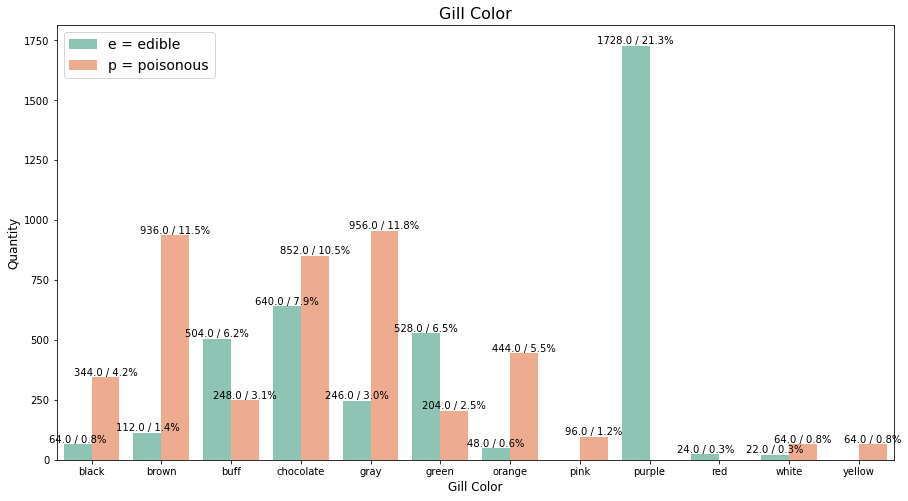

In [417]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=mushrooms, x='gill_color', hue='class_ep', palette='Set2', alpha=0.8)
ax.legend(['e = edible', 'p = poisonous'], fontsize=14)
ax.set_xlabel('Gill Color', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
ax.set_title('Gill Color', fontsize=16)
ax.set_xticklabels(('black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow'), fontsize=10)

total_cnt = mushrooms['class_ep'].count()

for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width/ 2, height + 20, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=10)

plt.show()

We can look at each individual colour to see the distribution of poisonous and edible mushrooms. For example:
* __89% of brown mushrooms are poisonous__
* Whereas __100% of the purple mushrooms in the sample are edible__

### 3.3 Exploring Ring Type

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


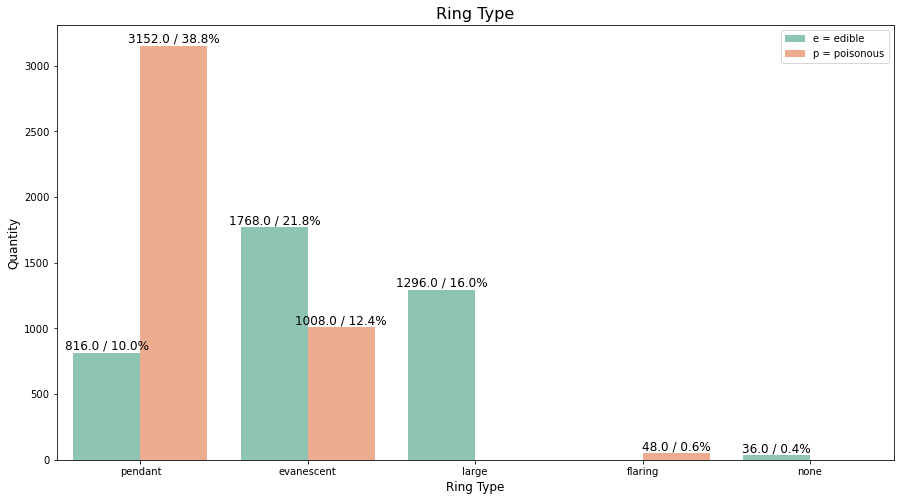

In [418]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=mushrooms, x='ring_type', hue='class_ep', palette='Set2', alpha=0.8)
ax.legend(['e = edible', 'p = poisonous'])
ax.set_xlabel('Ring Type', fontsize=12)
ax.set_xticklabels(('pendant', 'evanescent', 'large', 'flaring', 'none'), fontsize=10)
ax.set_ylabel('Quantity', fontsize=12)
ax.set_title('Ring Type', fontsize=16)

total_cnt = mushrooms['class_ep'].count()

for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width/ 2, height + 50, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)

Again, we can look at the each `ring_type` to spot potential important predictors. For example:
* Approx. __79%__ of mushrooms with __pendant rings where poisonous__
* whereas __100% of mushrooms in the sample with large rings were edible__ 

### 3.4 Exploring Stalk Root

posx and posy should be finite values
posx and posy should be finite values


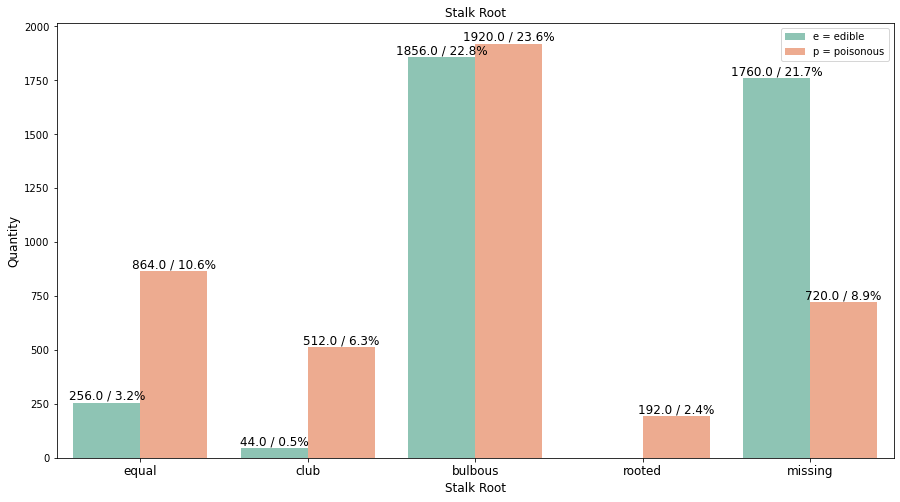

In [419]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=mushrooms, x='stalk_root', hue='class_ep', palette='Set2', alpha=0.8)
ax.legend(['e = edible', 'p = poisonous'])
ax.set_xlabel('Stalk Root', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
ax.set_xticklabels(('equal', 'club', 'bulbous', 'rooted', 'missing'), fontsize=12)
plt.title('Stalk Root')

total_cnt = mushrooms['class_ep'].count()

for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width/ 2, height + 30, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)

__Stalk Root__
* Approx. __92%__ of mushrooms classified as having a `club` stalk root are __poisonous__. Also, __77%__ of mushrooms classified as having an `equal` stalk root are __poisonous__. 

### 3.5 Exploring Gill Spacing

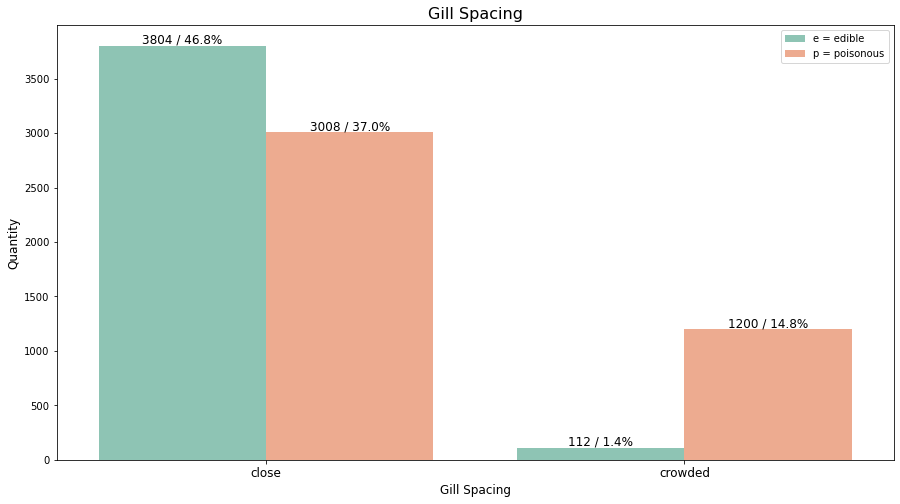

In [420]:
plt.figure(figsize=(15,8))
ax=sns.countplot(data=mushrooms, x='gill_spacing', hue='class_ep', palette='Set2', alpha=0.8)
ax.legend(['e = edible', 'p = poisonous'])
ax.set_xlabel('Gill Spacing', fontsize=12)
ax.set_ylabel('Quantity', fontsize=12)
ax.set_title('Gill Spacing', fontsize=16)
ax.set_xticklabels(('close', 'crowded'), fontsize=12)

total_cnt = mushrooms['class_ep'].count()

for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width/ 2, height + 50, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=12)

* There is not a big difference between poisonous vs edible mushrooms with `close` gill spacing so we can't deduce anything from this.
* Whereas mushrooms with `crowded` gills in the sample are around 10x more likely to be poisonous than edible.

## 4. Creating a Supervised Machine Learning Model

### 4.1 Use `LabelEncoder()` to convert the categorical features to numeric data

In [421]:
def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
#     print(le.classes_)
    return le.transform(feat)

In [422]:
for col in mushrooms.columns:
    mushrooms[str(col)] = label_encoded(mushrooms[str(col)])

class_ep ['e' 'p']
cap_shape ['b' 'c' 'f' 'k' 's' 'x']
cap_surface ['f' 'g' 's' 'y']
cap_color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill_attachment ['a' 'f']
gill_spacing ['c' 'w']
gill_size ['b' 'n']
gill_color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk_shape ['e' 't']
stalk_root ['?' 'b' 'c' 'e' 'r']
stalk_surface_above_ring ['f' 'k' 's' 'y']
stalk_surface_below_ring ['f' 'k' 's' 'y']
stalk_color_above_ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk_color_below_ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil_type ['p']
veil_color ['n' 'o' 'w' 'y']
ring_number ['n' 'o' 't']
ring_type ['e' 'f' 'l' 'n' 'p']
spore_print_color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


#### Check the dataset

In [423]:
mushrooms.head()

,class_ep,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### 4.2 Training Our Machine Learning Model

In [426]:
y = mushrooms['class_ep']
X = mushrooms.drop(['class_ep'], axis=1)


In [427]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### 4.2.1 Decision Tree Classifier

In [428]:
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [429]:
parameters = {'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt','log2'], 'min_samples_leaf':range(1,100,1), 'max_depth':(1,50,1), 'class_weight':('balanced', None)}

dtc = DecisionTreeClassifier()
model_dtc=dtc.fit(X_train, y_train)

In [430]:
cr_dtc = classification_report(y_test, y_pred_dtc)
print(cr_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [431]:
y_pred_dtc = model_dtc.predict(X_test)# This will give you positive class prediction probabilities  
#y_pred_dtc = np.where(y_prob_dtc > 0.1, 1, 0) # This will threshold the probabilities to give class predictions.
model_dtc.score(X_test, y_pred_dtc)

1.0

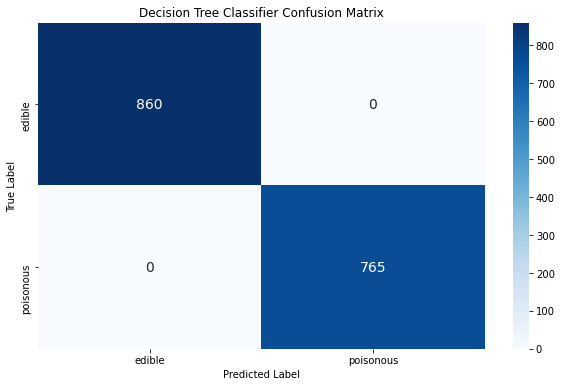

In [432]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,y_pred_dtc)
sns.heatmap(cm, annot=True, annot_kws={'size':14}, cmap='Blues', xticklabels=['edible','poisonous'], yticklabels=['edible','poisonous'],fmt='g')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

[Text(667.9903846153846, 1019.25, 'gill_color <= 3.5\ngini = 0.5\nsamples = 6499\nvalue = [3348, 3151]'),
 Text(321.9230769230769, 883.35, 'population <= 3.5\ngini = 0.279\nsamples = 2653\nvalue = [445, 2208]'),
 Text(128.76923076923077, 747.45, 'spore_print_color <= 1.5\ngini = 0.21\nsamples = 471\nvalue = [415, 56]'),
 Text(64.38461538461539, 611.55, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(193.15384615384616, 611.55, 'gill_size <= 0.5\ngini = 0.08\nsamples = 433\nvalue = [415, 18]'),
 Text(128.76923076923077, 475.65, 'gini = 0.0\nsamples = 415\nvalue = [415, 0]'),
 Text(257.53846153846155, 475.65, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(515.0769230769231, 747.45, 'stalk_root <= 2.0\ngini = 0.027\nsamples = 2182\nvalue = [30, 2152]'),
 Text(450.69230769230774, 611.55, 'stalk_surface_below_ring <= 0.5\ngini = 0.008\nsamples = 2161\nvalue = [9, 2152]'),
 Text(386.3076923076923, 475.65, 'bruises <= 0.5\ngini = 0.42\nsamples = 30\nvalue = [9, 21]'),
 Text(321.92307

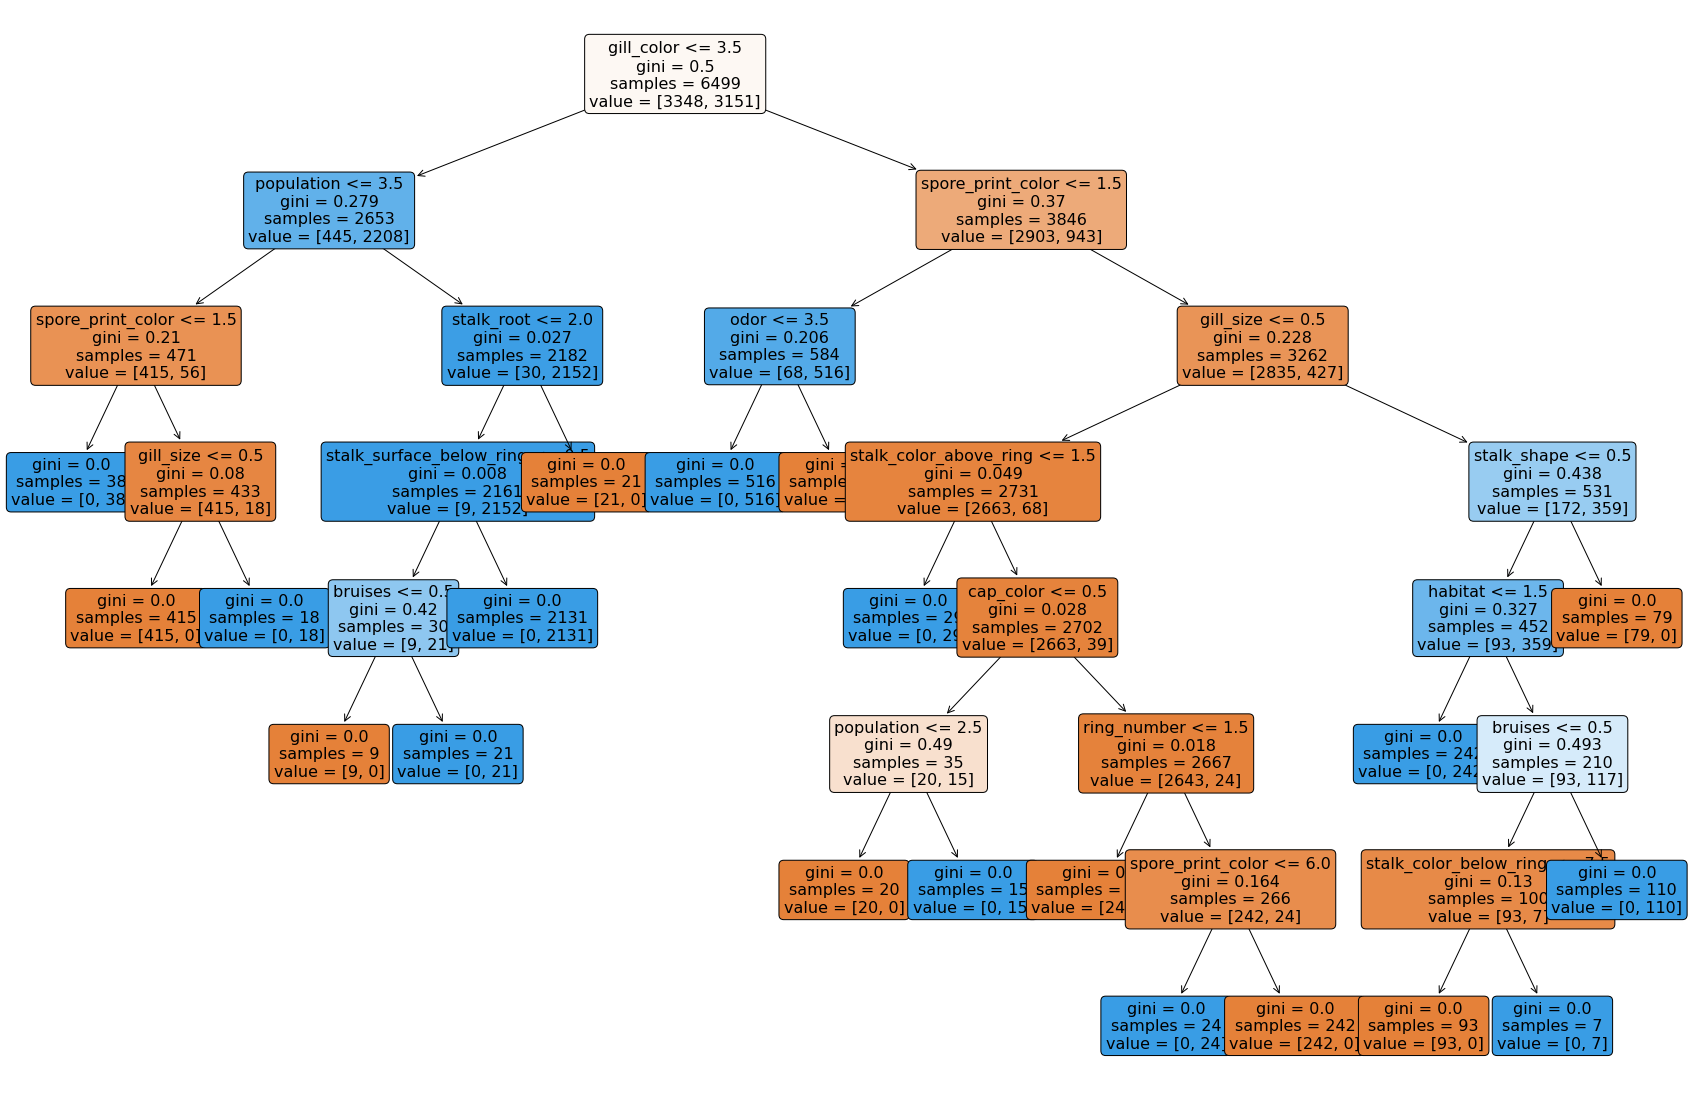

In [433]:
plt.figure(figsize=(30,20))
plt.title('Decision Tree')
plot_tree(model_dtc, feature_names=X_train.columns, filled=True, rounded = True,fontsize= 16)

### 4.2.2 Random Forest Classifier

In [434]:
rfc = RandomForestClassifier(n_estimators=5, random_state=1)
model_rfc = rfc.fit(X_train, y_train)

In [435]:
y_pred_rfc = model_rfc.predict(X_test)

In [436]:
model_rfc.score(X_test, y_pred_rfc)

1.0

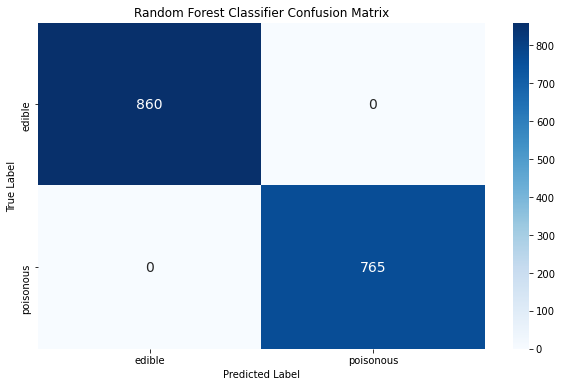

In [437]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm, annot=True, annot_kws={'size':14}, cmap='Blues', xticklabels=['edible','poisonous'], yticklabels=['edible','poisonous'],fmt='g')
plt.title('Random Forest Classifier Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [438]:
cr_rfc = classification_report(y_test, y_pred_rfc)
print(cr_dtc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       765

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [439]:
feature_scores = pd.Series(model_rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [440]:
print('The importance of features ranked from high to low:\n {}'.format(feature_scores))

The importance of features ranked from high to low:
 gill_color                  0.195987
spore_print_color           0.111004
gill_size                   0.102609
stalk_surface_above_ring    0.090584
odor                        0.081827
stalk_root                  0.078026
ring_type                   0.071678
stalk_color_above_ring      0.058185
stalk_surface_below_ring    0.050080
population                  0.031232
stalk_shape                 0.024021
habitat                     0.020308
ring_number                 0.019516
bruises                     0.019071
cap_color                   0.016067
gill_spacing                0.009720
stalk_color_below_ring      0.009396
cap_surface                 0.008667
cap_shape                   0.002022
veil_type                   0.000000
veil_color                  0.000000
gill_attachment             0.000000
dtype: float64


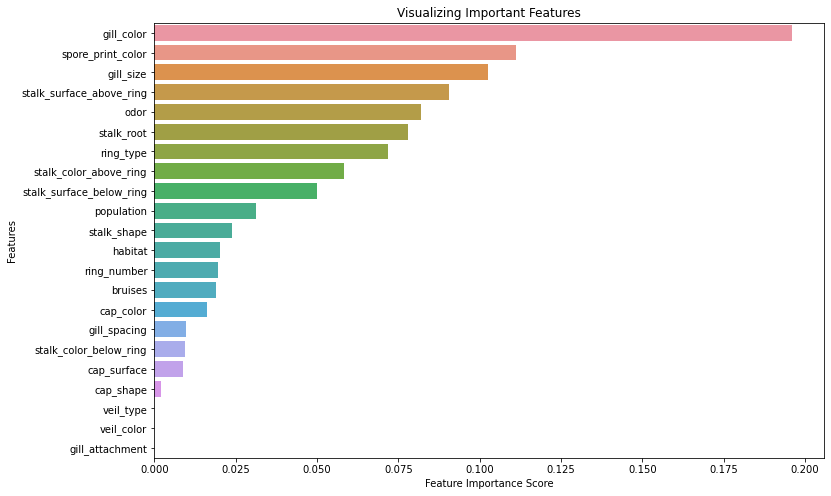

In [441]:
plt.figure(figsize=(12,8))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

We know that there isn't a single predictor for our target variable and it is likely to be a combination of all these features that will predict whether or not a mushroom is poisonous or not. Based on our Random Forest model, the most important predictors are actually (in order of importance):
* `gill_color`
* `spore_print_color`
* `gill_size`
* `stalk_surface_above_ring` 
* `odor`
* `stalk_root`